In [763]:
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input Cells

In [764]:
demography = pd.read_excel('data/DEMOGRAPHY_100.xlsx')

In [765]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [766]:
# demography[demography['Favourite category'] == 'Asian cuisine'].mode()

In [767]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,58.648649,77.162162,0.457297
Czech cuisine,50.361111,65.527778,0.406667
Italian cuisine,52.222222,92.037037,0.470741


# Favourite category

In [768]:
demography.value_counts('Favourite category')

Favourite category
Asian cuisine      37
Czech cuisine      36
Italian cuisine    27
dtype: int64

<AxesSubplot:ylabel='None'>

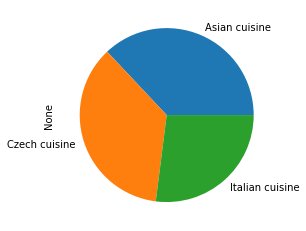

In [769]:
demography.value_counts('Favourite category').plot(kind='pie')

# Ad Type

In [770]:
demography.value_counts('Favourite ad type')

Favourite ad type
print-on-bus             39
hostess on the street    19
promo stand big          17
promo stand small        16
billboard                 5
citylight                 2
radio spot                2
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [771]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

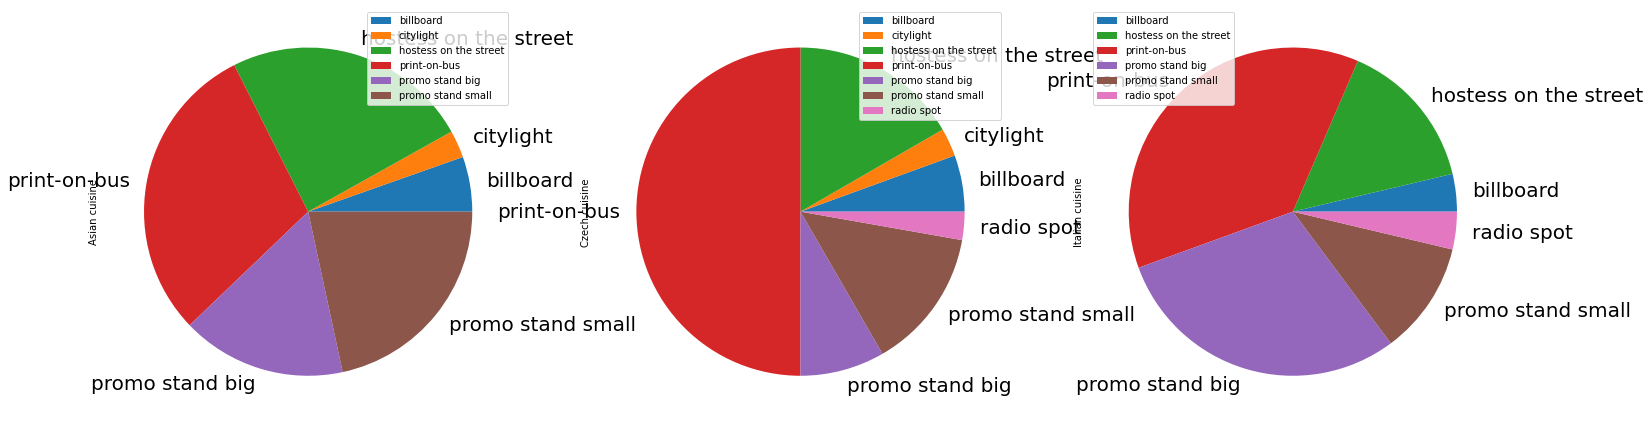

In [772]:
cat_ad_graph.plot(subplots=True, kind='pie', figsize=(25,25), fontsize=20);

In [773]:
asian = cat_ad_graph['Asian cuisine'].reset_index()

In [774]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [775]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

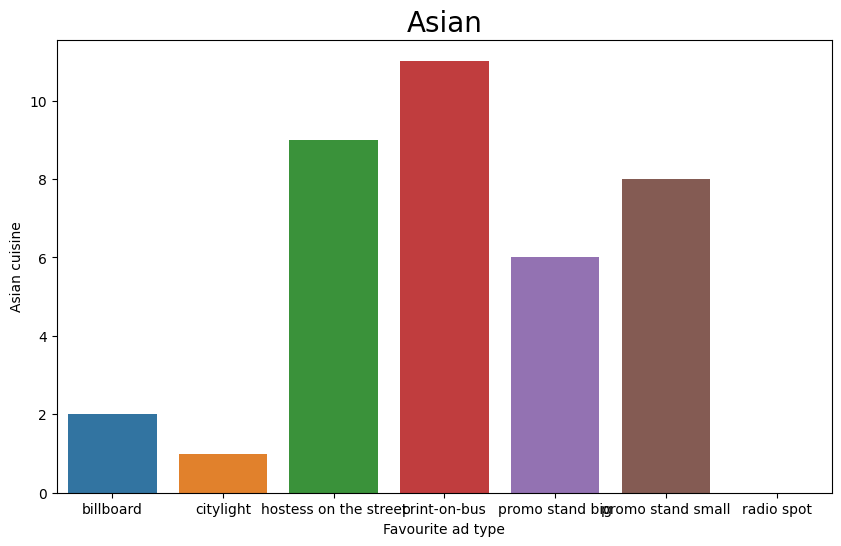

In [776]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

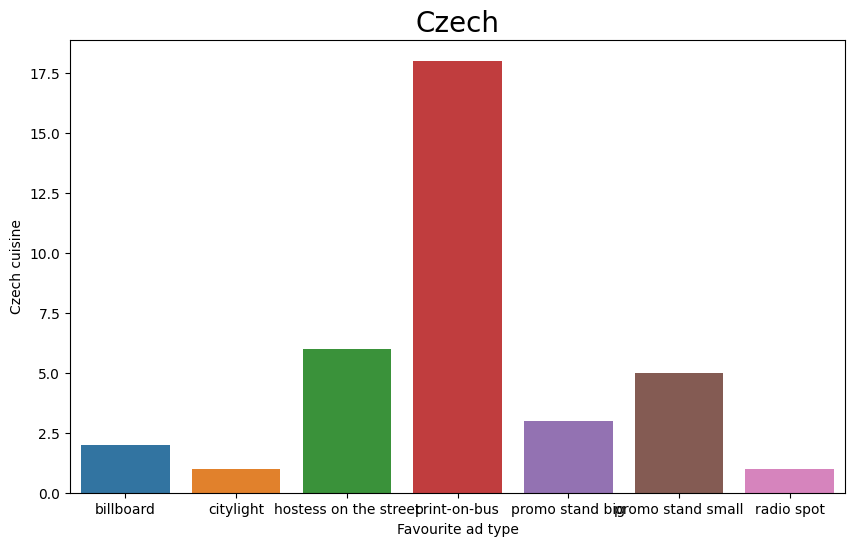

In [777]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

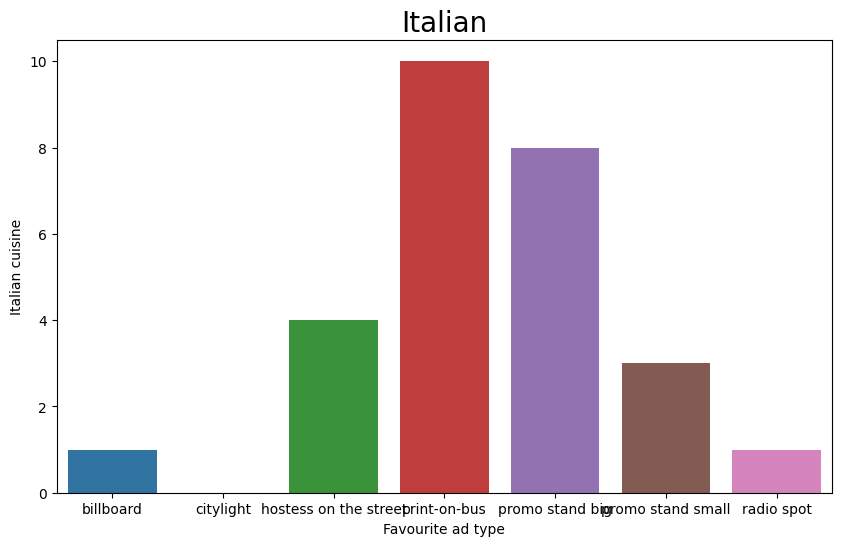

In [778]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

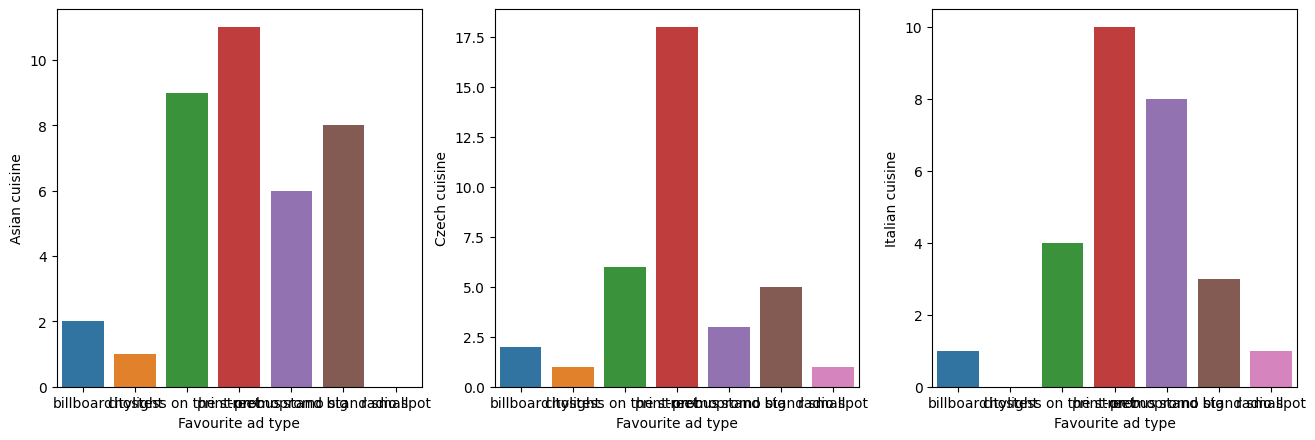

In [779]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2]);

# Более точная выборка дней по кухне и рекламе

In [780]:
new_df = demography[demography['Favourite category'] == 'Asian cuisine']

In [781]:
new_df[demography['Favourite ad type'] == 'hostess on the street'].describe(include=['object'])

/var/folders/xv/0c_fmv_n7hv5t7wzxwnk1zmh0000gn/T/ipykernel_34351/3762419244.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[demography['Favourite ad type'] == 'hostess on the street'].describe(include=['object'])


,Name,Gender,Favourite category,Favourite ad type,MON 0-8h,MON 8-16h,MON 16-24h,TUE 0-8h,TUE 8-16h,TUE 16-24h,...,THU 16-24h,FRI 0-8h,FRI 8-16h,FRI 16-24h,SAT 0-8h,SAT 8-16h,SAT 16-24h,SUN 0-8h,SUN 8-16h,SUN 16-24h
count,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
unique,9,2,1,1,3,3,3,2,2,3,...,2,2,3,2,3,3,2,2,3,2
top,MR,Female,Asian cuisine,hostess on the street,Built-up,Outskirts,Built-up,Outskirts,Outskirts,City center,...,Outskirts,Outskirts,Built-up,Built-up,Built-up,City center,Outskirts,Outskirts,City center,Outskirts
freq,1,6,9,9,4,6,4,6,7,4,...,7,8,4,5,5,7,7,8,6,8


In [782]:
cz_df = demography[demography['Favourite category'] == 'Czech cuisine']

In [783]:
cz_df[demography['Favourite ad type'] == 'print-on-bus'].describe(include=['object'])

/var/folders/xv/0c_fmv_n7hv5t7wzxwnk1zmh0000gn/T/ipykernel_34351/2885608400.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cz_df[demography['Favourite ad type'] == 'print-on-bus'].describe(include=['object'])


,Name,Gender,Favourite category,Favourite ad type,MON 0-8h,MON 8-16h,MON 16-24h,TUE 0-8h,TUE 8-16h,TUE 16-24h,...,THU 16-24h,FRI 0-8h,FRI 8-16h,FRI 16-24h,SAT 0-8h,SAT 8-16h,SAT 16-24h,SUN 0-8h,SUN 8-16h,SUN 16-24h
count,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
unique,17,2,1,1,3,3,3,3,2,3,...,2,3,3,3,2,3,2,3,2,3
top,ZJ,Male,Czech cuisine,print-on-bus,Built-up,Built-up,Built-up,Outskirts,Outskirts,Built-up,...,Outskirts,Outskirts,City center,Built-up,Built-up,Outskirts,Outskirts,Outskirts,Outskirts,Outskirts
freq,2,11,18,18,10,12,10,9,14,13,...,16,14,9,13,16,10,12,10,12,10


# WIP

In [784]:
fig1 = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(demography['Weekly income'], demography['Preferred quality'])

<Figure size 432x288 with 0 Axes>

In [785]:
demography.groupby(['Favourite category']).describe(include=['object'])

Name                 Gender                      \
                   count unique top freq  count unique     top freq   
Favourite category                                                    
Asian cuisine         37     35  AT    2     37      2  Female   21   
Czech cuisine         36     31  ZJ    2     36      2    Male   19   
Italian cuisine       27     26  AN    2     27      2    Male   18   

                   Favourite ad type         ...   SUN 0-8h      SUN 8-16h  \
                               count unique  ...        top freq     count   
Favourite category                           ...                             
Asian cuisine                     37      6  ...  Outskirts   22        37   
Czech cuisine                     36      7  ...  Outskirts   17        36   
Italian cuisine                   27      6  ...  Outskirts   12        27   

                                            SUN 16-24h                         
                   unique          top freq      count unique        top freq  
Favourite category                                                             
Asian cuisine           3  City center   20         37      3  Outskirts   34  
Czech cuisine           2    Outskirts   22         36      3  Outskirts   19  
Italian cuisine         3  City center   14         27      3  Outskirts   15  

[3 rows x 96 columns]